## X-ray detection and imaging

This notebook is shared under the MIT-license. Copyright (C) 2023, B. Zeller-Plumhoff

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

We begin by loading the libraries you will require lateron for your calculations.

In [1]:
# import required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Exercise 1

Select three of the requirements for X-ray scintillators and give detailed reasoning why these are important.

#### Solution

- __high yield__ is required such that the number of scintillation light photons is similar to the number of X-ray photons. Thus, the exposure time during experiments can be reduced which enables faster experiments. This is critical to study dynamic processes.
- __good linearity__ to ensure that the contrast between features that is introduced by the difference in X-ray attenuation is translated into the contrast in the final image good linearity of the scintillator is required. This is critical to differentiate different features.
- __small time constant__ ensures that the incoming X-rays are converted into visible light with as small a delay as possible. Again, this is critical to study dynamic processes but also to decrease experiment times in general, so that the images can be recorded at a high speed.
- __transparent to scintillation light__ The scintillator musn't attenuate the scintillation light, otherwise longer imaging times are required and the observed image contrast may not be interpretable.
- __temperature stability__ The X-rays that are absorbed by the scintillating material are only partly emitted as scintillation light. Most of the energy is lost as heat. Therefore, the scintillator material needs to be temperature stable to remain unaffected.
	

### Exercise 2

The refractive index components for gold at different energies are given in the following table:

| Energy (keV) | Delta | Beta |
| --- | --- | --- |
| 10 | 2.99E-05 | 2.21E-06 |
| 15 | 1.35E-05 | 2.02E-06 |
| 20 | 7.95E-06 | 7.26E-07 |
| 25 | 5.13E-06 | 3.23E-07 |
| 30 | 3.56E-06 | 1.65E-07 |

Please calculate the linear attenuation coefficient of gold at the given X-ray energies keV, indicating all assumption you are making and stating all used parameter values. Based on the attenuation coefficient, calculate the maximum thickness of a gold wire to be imaged using X-ray computed tomography, such that a transmission ($I/I_0$) of 10\% is ensured at all times. Note that the speed of light $c=2.998\cdot10^{8}$ m/s and Planck's constant $h=4.136\cdot10^{-15}$ eV$\cdot$s. Please explain any non-linear behaviour that you may notice in the assessment of the energies.

#### Solution
The refractive index component $\beta$ relates to the linear attenuation $\mu$ \emph{via} $$\mu=\frac{4\pi}{\lambda}\beta$$ where $\lambda$ is the wavelength of the X-ray beam. The wavelength $\lambda$ of the X-ray beam relates to its energy $E$ \emph{via} $$\lambda=\frac{hc}{E}$$ where $h$ is Planck's constant and $c$ the speed of light. Given the linear attenuation coefficient, the transmission $T$ of a sample of thickness $l$ can be computed as $$T=exp^{-\mu l}$$ We require that $T\geq 0.1$, thus $$0.1\leq exp^{-\mu l}$$ and therefore $$l\leq -ln(0.1)/\mu$$ Entering the given values in the respective equations we obtain the following:

In [2]:
# set parameters as given in the exercise sheet
h=4.136*10**(-15) #eV*s
c=2.998*10**(8) #m/s
E=np.array([10,15,20,25,30]) #keV
beta=np.array([2.21E-06,2.02E-06,7.26E-07,3.23E-07,1.65E-07])

# calculate lambda, mu and l_max
lbda=h*c/(E*1000) # m
mu=4*np.pi/lbda*beta # m^(-1)
l_max=-np.log(0.1)/mu*1000 # mm

# display results and input data in pandas dataframe format
pd.DataFrame(np.transpose([E,lbda,beta,mu,l_max]),columns=['Energy / keV','\u03BB / m',' \u03B2','\u03BC / m^(-1)','l_max / mm'])

,Energy / keV,λ / m,β,μ / m^(-1),l_max / mm
0,10.0,1.239973e-10,2.210000e-06,223970.066583,0.010281
1,15.0,8.266485e-11,2.020000e-06,307072.082238,0.007499
2,20.0,6.199864e-11,7.260000e-07,147151.374063,0.015648
3,25.0,4.959891e-11,3.230000e-07,81835.216636,0.028137
4,30.0,4.133243e-11,1.650000e-07,50165.241158,0.045900


To assess the maximum wire thickness more easily, let's plot it.

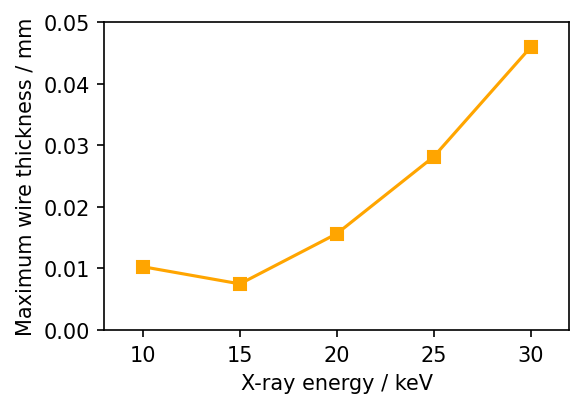

In [3]:
# import required libraries
import matplotlib.pyplot as plt

# set plot parameters (dpi and plot size)
my_dpi=150
plt.figure(figsize=(600/my_dpi,400/my_dpi), dpi=my_dpi)

# plot maximum wire thickness against X-ray photon energy
plt.plot(E,l_max,c='orange',marker='s')
plt.ylabel('Maximum wire thickness / mm')
plt.xlabel('X-ray energy / keV')
plt.ylim([0,0.05])
plt.xlim([8,32])
plt.tight_layout
plt.show()

We observe that the maximum diameter (or transmission length) of the gold wire at 15 keV must be smaller than that at 10 keV (0.007 mm vs. 0.01 mm). This is due to the fact that the L-edges of gold are located between 10 and 15 keV, leading to a strong increase in the photoelectric absorption cross-section and hence attenuation coefficient.

### Exercise 3

It was very inconvenient to have to manually type the values of the exercise above into arrays. Go to [https://henke.lbl.gov/optical_constants/getdb2.html ] and extract a text file for the refractive index components of magnesium, gadolinium and gold.  Use the pandas instead to read in the text files and plot the both refractive index components for the three materials against each other. What do you observe?

#### Solution

If you follow the link you get to an interface that looks as follows:
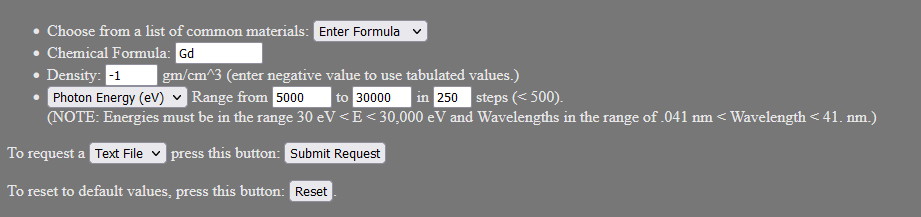
You should enter the element or composition of your material, as well as it's density (not necessary for elements) and the X-ray energies at which you want to assess the refractive index components. For this exercise, I selected 5-30keV, which is a reasonable range we might work at at the synchrotron and step size of 250 eV. Select the request for text file and click submit. A new tab will open with the file, which you can copy and save in any text editor.

In the next step, we make use of the working with jupyter introduction and use pandas to load the datasets.

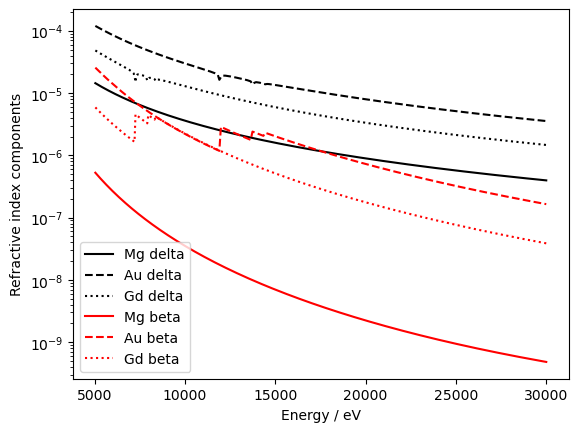

In [4]:
# load text files as dataframes
data_Mg=pd.read_csv('Mg_delta_beta.txt', sep=' ', header=2, usecols=[2,4,6], names=['Energy / eV', 'delta','beta'])
data_Au=pd.read_csv('Au_delta_beta.txt', sep=' ', header=2, usecols=[2,4,6], names=['Energy / eV', 'delta','beta'])
data_Gd=pd.read_csv('Gd_delta_beta.txt', sep=' ', header=2, usecols=[2,4,6], names=['Energy / eV', 'delta','beta'])

# plot the delta and beta values of the three elements in one graph
plt.plot(data_Mg['Energy / eV'], data_Mg['delta'],color='black',label='Mg delta')
plt.plot(data_Au['Energy / eV'], data_Au['delta'],color='black',linestyle='dashed',label='Au delta')
plt.plot(data_Gd['Energy / eV'], data_Gd['delta'],color='black',linestyle='dotted',label='Gd delta')
plt.plot(data_Mg['Energy / eV'], data_Mg['beta'],color='red',label='Mg beta')
plt.plot(data_Au['Energy / eV'], data_Au['beta'],color='red',linestyle='dashed',label='Au beta')
plt.plot(data_Gd['Energy / eV'], data_Gd['beta'],color='red',linestyle='dotted',label='Gd beta')
plt.xlabel('Energy / eV')
plt.ylabel('Refractive index components')
plt.legend()
plt.yscale('log')

We can see that for all elements, the delta component is larger than the beta component of the refractive index. This indicates, that the induced phase shift will be larger than the attenuation of the X-rays. If we want to assess this difference in detail, we can plot it. We can also see that the both delta and beta decrease with increasing energy. However, this decrease is larger for the attenuation than for the phase shift.